This markdown is a complete analysis of demonetisation tweets dataset available on Kaggle.com

In [1]:
#import all the required modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS


In [54]:
tweets = pd.read_csv('demonetization-tweets.csv', encoding = 'ISO-8859-1')
tweets


,Unnamed: 0,X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,1,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,2,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,4,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,5,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,6,@DerekScissors1: Indias #demonetization: #Bla...,False,0,DerekScissors1,2016-11-23 18:39:11,False,NaN,8.014953e+17,2.586266e+09,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,2016-11-23 18:38:53,False,NaN,8.014952e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,8,RT @Joydeep_911: Calling all Nationalists to j...,False,0,NaN,2016-11-23 18:38:20,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,9,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,2016-11-23 18:38:09,False,NaN,8.014951e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,10,National reform now destroyed even the essence...,False,0,NaN,2016-11-23 18:38:00,True,NaN,8.014950e+17,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


In [55]:
#Drop all the unnecessary columns
tweets = tweets.drop(['X','replyToUID','favorited','replyToSN','truncated','replyToSID','id','replyToUID'], axis=1)

In [56]:
tweets

,Unnamed: 0,text,favoriteCount,created,statusSource,screenName,retweetCount,isRetweet,retweeted
0,1,RT @rssurjewala: Critical question: Was PayTM ...,0,2016-11-23 18:40:30,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,2,RT @Hemant_80: Did you vote on #Demonetization...,0,2016-11-23 18:40:29,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,3,"RT @roshankar: Former FinSec, RBI Dy Governor,...",0,2016-11-23 18:40:03,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,4,RT @ANI_news: Gurugram (Haryana): Post office ...,0,2016-11-23 18:39:59,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,5,RT @satishacharya: Reddy Wedding! @mail_today ...,0,2016-11-23 18:39:39,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False
5,6,@DerekScissors1: Indias #demonetization: #Bla...,0,2016-11-23 18:39:11,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ambazaarmag,0,False,False
6,7,RT @gauravcsawant: Rs 40 lakh looted from a ba...,0,2016-11-23 18:38:53,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False
7,8,RT @Joydeep_911: Calling all Nationalists to j...,0,2016-11-23 18:38:20,"<a href=""http://twitter.com/download/android"" ...",KARUNASHANKEROJ,112,True,False
8,9,RT @sumitbhati2002: Many opposition leaders ar...,0,2016-11-23 18:38:09,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False
9,10,National reform now destroyed even the essence...,0,2016-11-23 18:38:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",HelpIndia2016,0,False,False


Let us now add some words which are extremely repeatetive in our tweets but not adding value to our wordcloud. I am adding a few words to the default stopwords list that comes with WordCloud module.

sw - placeholder for customized stopwords
newsw - My text file that holds required words

In [57]:
sw = STOPWORDS.copy()

newsw = open('sw.txt', 'r', encoding='UTF-8')

for r in newsw:
    sw.add(r[:-1])
    



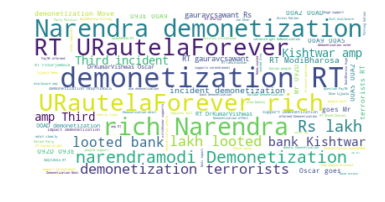

In [58]:
stopwords = sw

wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2018).generate(" ".join([i for i in tweets['text']]))
# show
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure()

How are the tweets - positive? negative? neutral?

In [59]:
from textblob import TextBlob

In [60]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                              
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #tweets are cleaned here(after replacing the above pattern to space which means deleting)


def get_polarity(tweet):                         
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [61]:
## Adding Sentiment Column
tweets['Sentiment'] = np.array([ get_polarity(tweet) for tweet in tweets['text'] ])

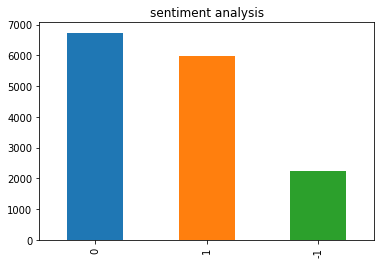

In [62]:

#plot sentiments polarity 
tweets.Sentiment.value_counts().plot(kind='bar',title="sentiment analysis")



Most people have tweeted neutral and positive feelings. But we should take a note here - people who are tweeting are educated enough, have a smart phone, a decent internet connection and hence, in general from well to do families(Middle Class). This class of society is least impacted by Demonetisation and hence less negative sentiments. The cash-dependent class of people like farmers, small merchants, vendors etc are most affected by this move. The negative sentiments most probably tries to catch lower income class of society for whom the demonetisation move caused a havoc.

Text(0.5,1,'Number of retweets by hour')

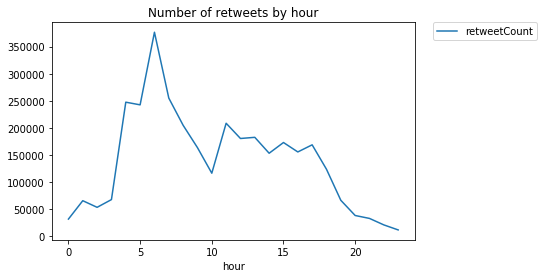

In [63]:
tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets_by_hour = tweets.groupby(['hour'])['retweetCount'].sum()
import seaborn as sns
tweets_by_hour.transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of retweets by hour')


Text(0.5,1,'Number of tweets by hour')

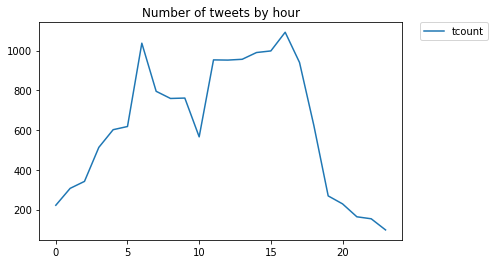

In [64]:
tweets['tcount'] =1
tweets.groupby(["hour"]).sum().reset_index()['tcount'].transpose().plot(kind='line',figsize=(6.5, 4))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Number of tweets by hour')

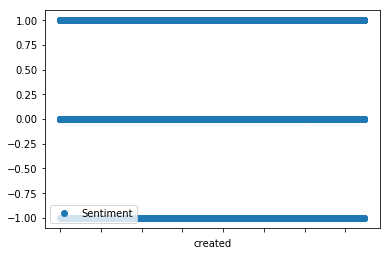

In [48]:
## Plotting sentiment points 

tweets.plot(x='created',y='Sentiment',style='o')
plt.show()



In [49]:
p_tweets = tweets[tweets['Sentiment'] > 0]
n_tweets = tweets[tweets['Sentiment'] < 0]
neutral_tweets = tweets[tweets['Sentiment']==0]

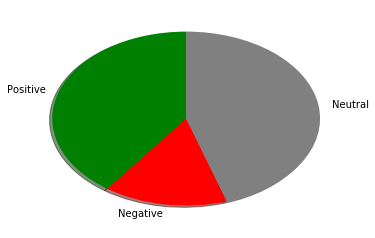

In [35]:
colors = ['green', 'red', 'grey']
sizes = [len(p_tweets), len(n_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)


plt.show()

In [ ]:
#Future work
#Google Trends

In [35]:
trend = pd.read_csv('~/Downloads/compare.csv', encoding = 'ISO-8859-1')

len(trend['Week'])


261

In [42]:
index = random.sample(list(trend['Week']),50)
criteria = trend['Week'].isin(index)
trend_new = trend[criteria]

list

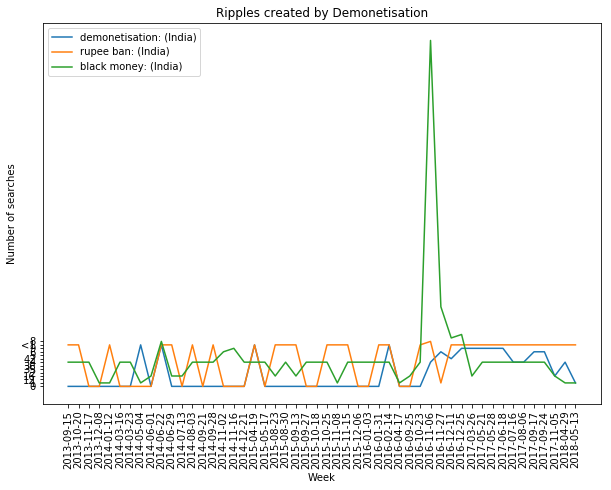

In [65]:
from pylab import *

figure(figsize=(10,7))
plot(trend_new['Week'],trend_new['demonetisation: (India)'])
plot(trend_new['Week'],trend_new['rupee ban: (India)'])
plot(trend_new['Week'],trend_new['black money: (India)'])
xlabel('Week')
xticks(trend_new['Week'],  rotation=90)
ylabel('Number of searches')
title('Ripples created by Demonetisation')
legend(loc = 'upper left')